# Multi-Axis signal filtering test

In this notebook, we check whether the filtering functions work for multi-axis data with shape (samples, channels).

## Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
from caits import filtering as filt
from caits.visualization import plot_signal

## Step 2: Initialize data

In this example, we generate 3 signals, where 2 first two are sine signals of 5 and 50 Hz, while the 3rd signal is the sum of these + some noise.

In [2]:
sampling_rate = 1000
duration = 1.0

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
n_samples = t.shape[0]

# Low-frequency sine (5 Hz)
ch1 = np.sin(2 * np.pi * 5 * t)

# High-frequency sine (50 Hz)
ch2 = np.sin(2 * np.pi * 50 * t)

# Mixed signal + noise
noise = 0.3 * np.random.randn(n_samples)
ch3 = ch1 + ch2 + noise

# Combine into shape (samples, channels)
data = np.stack((ch1, ch2, ch3), axis=-1)

data.shape

(1000, 3)

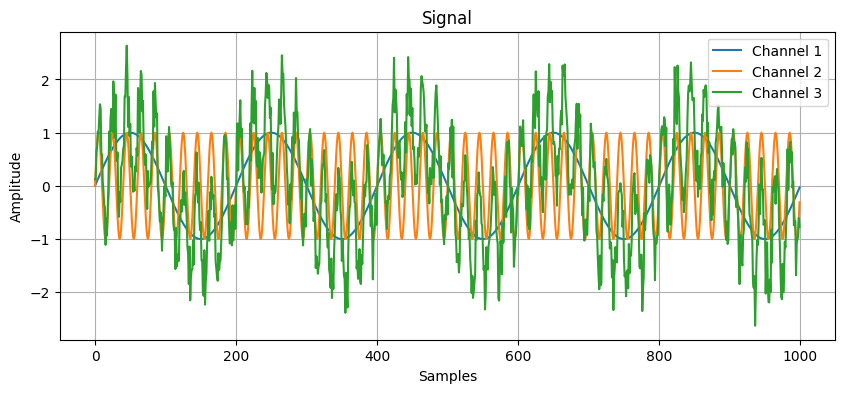

In [3]:
fig = plot_signal(data, sr=sampling_rate)

## Step 3: Gaussian filter

In [4]:
gaussian_filtered_data = filt.gaussian_filter(data, sigma=[1, 0])
gaussian_filtered_data.shape

(1000, 3)

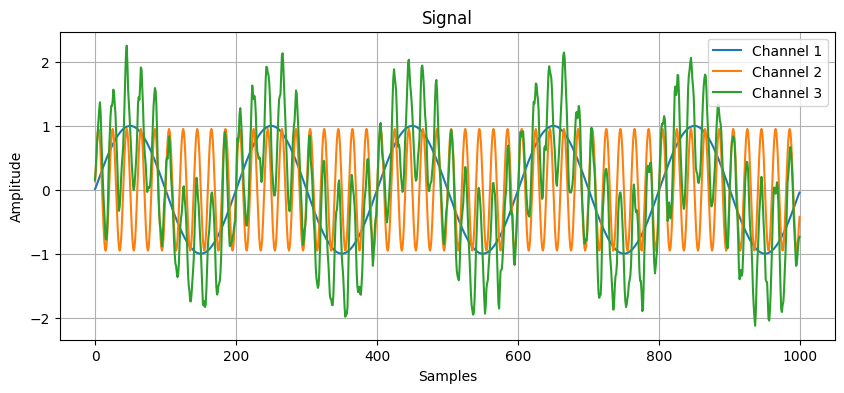

In [5]:
fig = plot_signal(gaussian_filtered_data, sr=sampling_rate)

## Step 4: Butterworth (lowpass) filter

In [6]:
butterworth_low_filtered_data = filt.filter_butterworth(data, fs=sampling_rate, filter_type="lowpass", cutoff_freq=10)
butterworth_low_filtered_data.shape


(1000, 3)

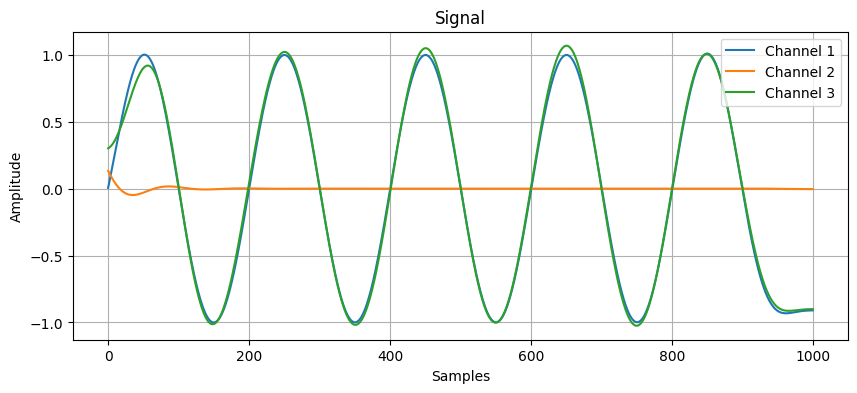

In [7]:
fig = plot_signal(butterworth_low_filtered_data, sr=sampling_rate)


## Step 5: Butterworth (highpass) filter

In [8]:
butterworth_high_filtered_data = filt.filter_butterworth(data, fs=sampling_rate, filter_type="highpass", cutoff_freq=10)
butterworth_high_filtered_data.shape


(1000, 3)

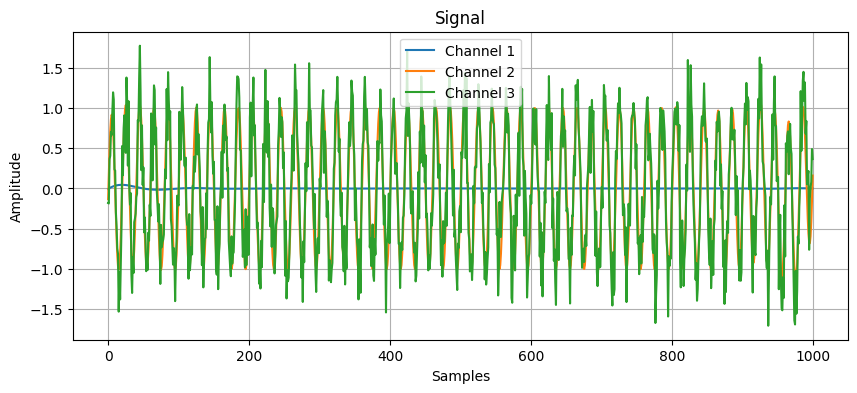

In [9]:
fig = plot_signal(butterworth_high_filtered_data, sr=sampling_rate)

## Step 6: Butterworth (bandpass) filter

In [10]:
butterworth_band_filtered_data = filt.filter_butterworth(data, fs=sampling_rate, filter_type="bandpass", cutoff_freq=(3, 70))
butterworth_band_filtered_data.shape

(1000, 3)

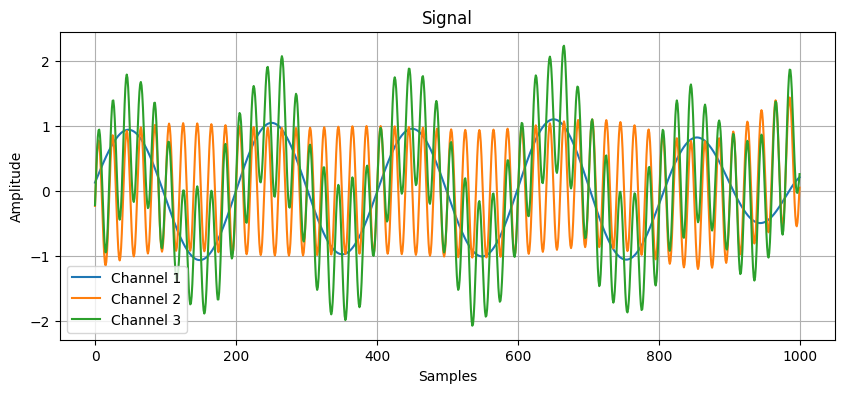

In [11]:
fig = plot_signal(butterworth_band_filtered_data, sr=sampling_rate)

In [12]:
butterworth_band_filtered_data = filt.filter_butterworth(data, fs=sampling_rate, filter_type="bandpass", cutoff_freq=(10, 70))
butterworth_band_filtered_data.shape


(1000, 3)

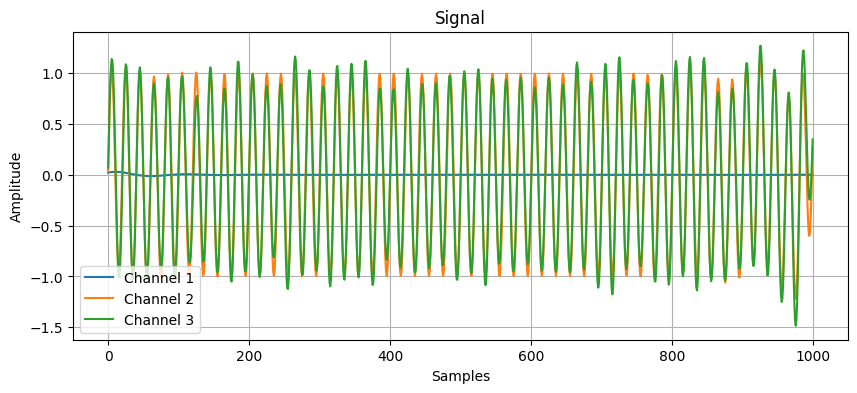

In [13]:
fig = plot_signal(butterworth_band_filtered_data, sr=sampling_rate)

## Step 7: Median filter simple

In [14]:
median_filtered_data = filt.filter_median_simple(data, kernel_size=(13, 1))
median_filtered_data.shape

(1000, 3)

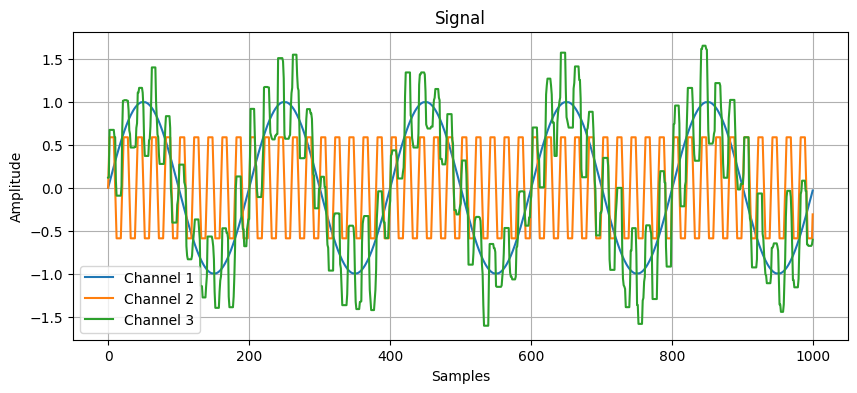

In [15]:
fig = plot_signal(median_filtered_data, sr=sampling_rate)

## Step 8: Median filter gen

In [16]:
median_gen_filtered_data = filt.filter_median_gen(data, window_size=(13, 1))
median_gen_filtered_data.shape

(1000, 3)

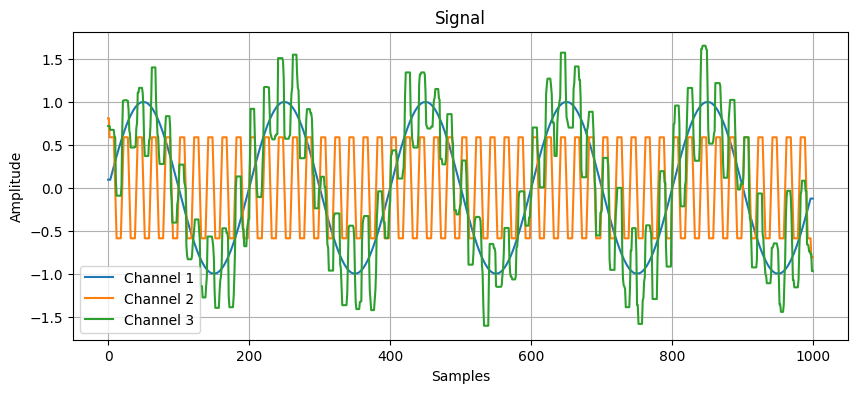

In [17]:
fig = plot_signal(median_gen_filtered_data, sr=sampling_rate)

# Real-world data

In [18]:
motion_df = pd.read_csv("data/scratching_eye.csv")

In [19]:
motion_df.head()

,acc_x_axis_g,acc_y_axis_g,acc_z_axis_g,gyr_x_axis_deg/s,gyr_y_axis_deg/s,gyr_z_axis_deg/s
0,1.131,0.342,-0.063,37.515,-44.408,-62.647
1,1.120,0.323,-0.241,35.563,22.143,-35.258
2,1.023,0.431,-0.146,42.212,78.263,-1.525
3,0.856,0.600,0.086,50.142,131.516,18.056
4,0.752,0.709,0.327,55.815,168.116,26.779


In [20]:
motion_channels = motion_df.columns.tolist()
motion_channels

['acc_x_axis_g',
 'acc_y_axis_g',
 'acc_z_axis_g',
 'gyr_x_axis_deg/s',
 'gyr_y_axis_deg/s',
 'gyr_z_axis_deg/s']

In [21]:
arr_motion = motion_df.values

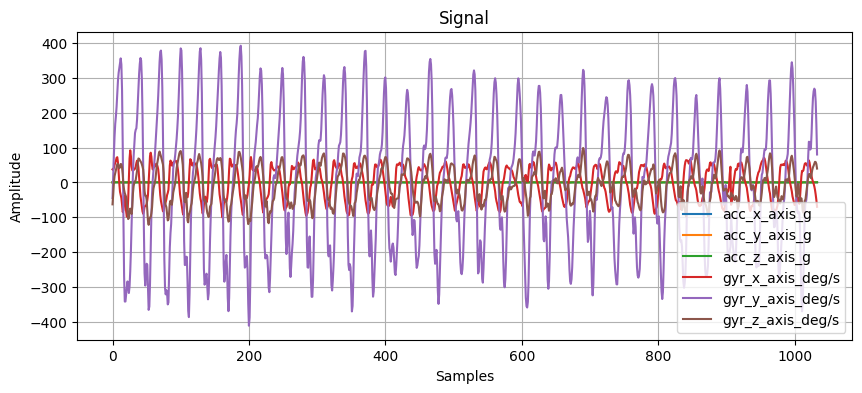

In [22]:
plot_signal(
    arr_motion,
    sr=100,
    channels=motion_channels,
    return_mode=False
)

In [23]:
arr_motion_filtered = filt.filter_butterworth(
    arr_motion,
    fs=sampling_rate,
    filter_type="bandpass",
    cutoff_freq=(10, 70)
)

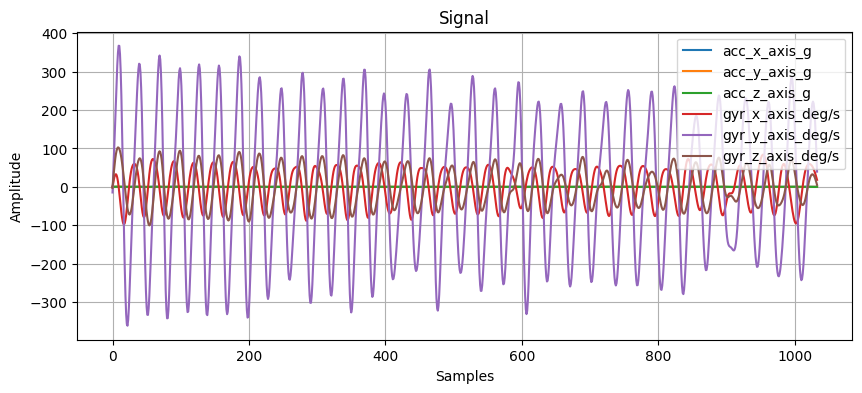

In [24]:
plot_signal(
    arr_motion_filtered,
    sr=100,
    channels=motion_channels,
    return_mode=False
)